# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

### Observations:

- *Call Option – Time Sensitivity:*

The rate of change of the call price with respect to time is negative and decreasing as time passes, especially as expiration nears where we observe a larger negative slope. This though is not true when we increase `r` (risk-free rate) above 0.1, as in that case we see a turning point close to the expiration time, after which the rate of change is positive. Furthermore, as we increase `r`, the rate of change is much faster at the beginning and then plateaus.

In general, these observations imply that call options lose value faster as expiration approaches.

- *Call Option – Spot Price Sensitivity:*

The rate of change of the call price with respect to the spot price (Delta) increases smoothly with spot price and approaches 1. Intiutively, this means the call behaves more like the underlying stock when the stock price is far above the strike, and it mirrors the stock's movement.

Furthermore, as the stock price rises past the strike, the call option becomes more sensitive to stock price changes, and we have a turning point (which is how we get an S-shaped curve).

Another thing worth noting is that we had an S-shaped curve in the case where we set $t=1$ (amount of time remaining until the option contract expires), and as we increased it, it would tend towards a concave down increasing shape. On the other hand, if we decreased $t<1$, we would be approaching a curve with a sudden jump in the middle of the spot price range.


**Remark:** Due to "Put–call parity", and the fact that we set the same $K$ and $r$ for both rates of changes when considering call and put prices, we obtain "identical" plots.

https://en.wikipedia.org/wiki/Put%E2%80%93call_parity

Specifically, under certain conditions (e.g. $r=0$), we can have $\frac{dP}{dt} \approx \frac{dC}{dt}$.

Below we note that if we introduce a positive risk-free interest rate (i.e. $r>0$) that the plots differ. In the case of call options the rate of change starts and ends at higher rates, while put options it starts and end at ends at lower rates (even reaching negative rates of change).

- *Put Option – Time Sensitivity:*

Here I obtained similar conlcusions to the sensitivity w.r.t. time of the call options, with the difference that here the negative slope was greater close to the time of expiration and flatter at the beginning (so right hand side of the curve), which could be interpreted that put options are more risky than call options (at least in the case where such rate of change plots are observed).

- *Put Option – Spot Price Sensitivity:*

Again, a similar observation was made here, where the rate of change of the call price with respect to the spot price (Delta) increases smoothly with spot price and approaches 1, and as the stock price rises past the strike, the call option becomes more sensitive to stock price changes. Here also, as the amount of time remaining until the option contract expires was increased (so closer to the time of buying the contract), the S-shape approached a concave curve.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

In [102]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

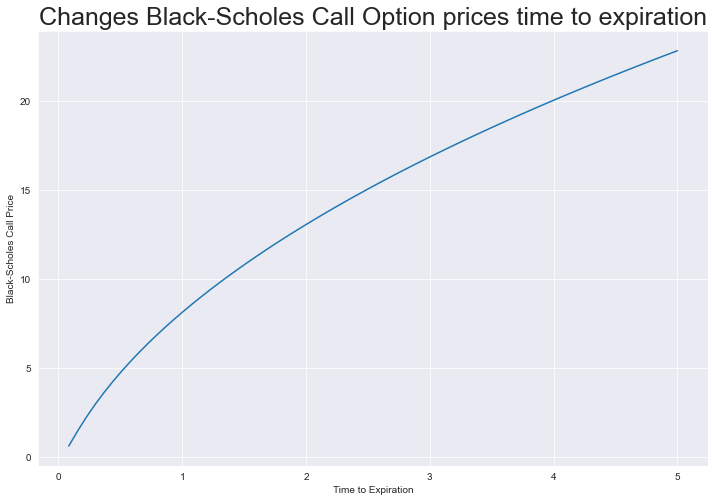

In [103]:
S0 = 100  # Current asset price
K = 110   # Strike price
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## **a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

### Initial observations:

The BS call option price seems to be increasing at a favorable rate, as we have the option to sell the option to buy it the strike price and immediately sell it at a higher price (as long as it is before expiration).

As time to expiration increases, the call option price increases, but the rate of increase slows down, i.e. the curve is concave down.

### **Potential strategy for such a call option**

One investment strategy if we have such a call option, is to buy (and immediately sell it) at the time right before the rate of increase flattens, is we won't have a multiplicative profit, and there may be a risk that the BS Call Option Price (from the first figure) may start decreasing.

Then, by selling at that time, we can invest or buy another call option (or invest it in a Put Option for the same stock) which has a rate of change/BS call option price trend similar to the ones observed above, in order to increase our overall profits.

In this scenario, a good idea would be to act as such a few months before the expiration date, unless of course we observe with time that the BS Call Option PRices deduced in the first plot above, are very inaccurate.

I believe this is the most natural approach to take, and something similar (probably more sophisticated) and done in proactice, known as ``_momentum-based rotation strategy_''; where one systematically shifts his/her investments between different sectors or asset classes based on their recent price performance. 

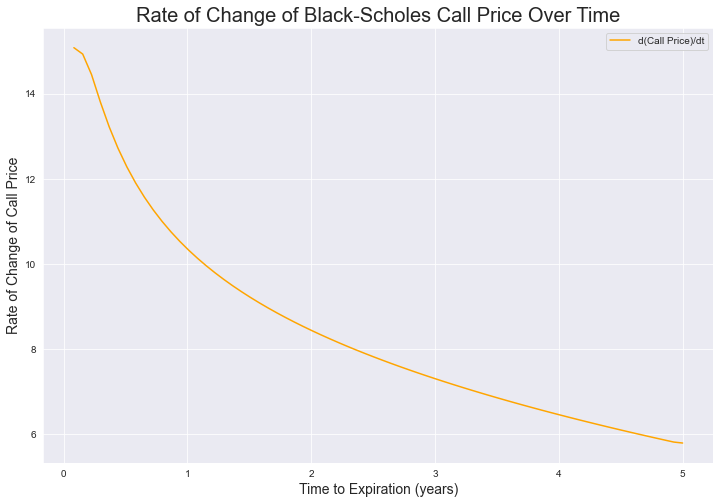

In [124]:
r = 0.1  # risk-free rate
times = np.linspace(1/12, 5, 70)

# call prices and their rate of change
# we calculate the rate of change through a numerical derivative
call_prices = np.array([bs_call(S0, K, sigma, t, r) for t in times])
rate_of_change_call = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_call, color='orange', label='d(Call Price)/dt')
plt.title('Rate of Change of Black-Scholes Call Price Over Time', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Call Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

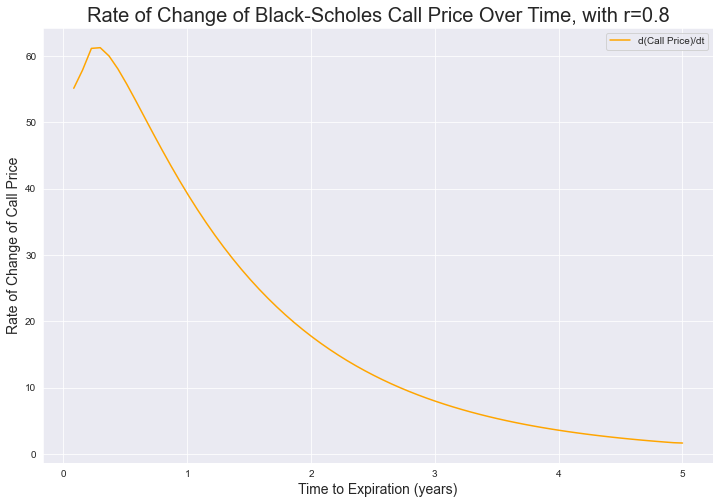

In [130]:
r = 0.8  # risk-free rate
times = np.linspace(1/12, 5, 70)

# call prices and their rate of change
# we calculate the rate of change through a numerical derivative
call_prices = np.array([bs_call(S0, K, sigma, t, r) for t in times])
rate_of_change_call = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_call, color='orange', label='d(Call Price)/dt')
plt.title(f'Rate of Change of Black-Scholes Call Price Over Time, with r={r}', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Call Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

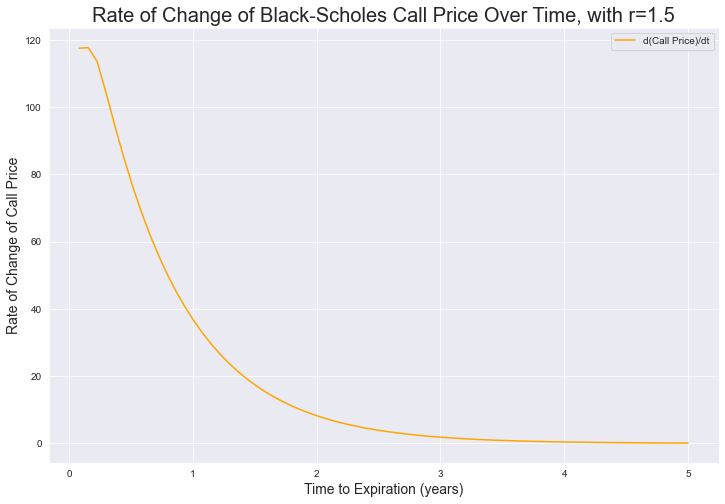

In [127]:
r = 1.5  # risk-free rate
times = np.linspace(1/12, 5, 70)

# call prices and their rate of change
# we calculate the rate of change through a numerical derivative
call_prices = np.array([bs_call(S0, K, sigma, t, r) for t in times])
rate_of_change_call = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_call, color='orange', label='d(Call Price)/dt')
plt.title(f'Rate of Change of Black-Scholes Call Price Over Time, with r={r}', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Call Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## **b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

https://www.merrilledge.com/investment-products/options/learn-understand-delta-options

$\Delta = \frac{\partial C}{\partial S_0} = \text{norm.cdf(d1)}$

In [105]:
# Delta: rate of change of call price w.r.t. S0
def call_delta(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    return norm.cdf(d1)

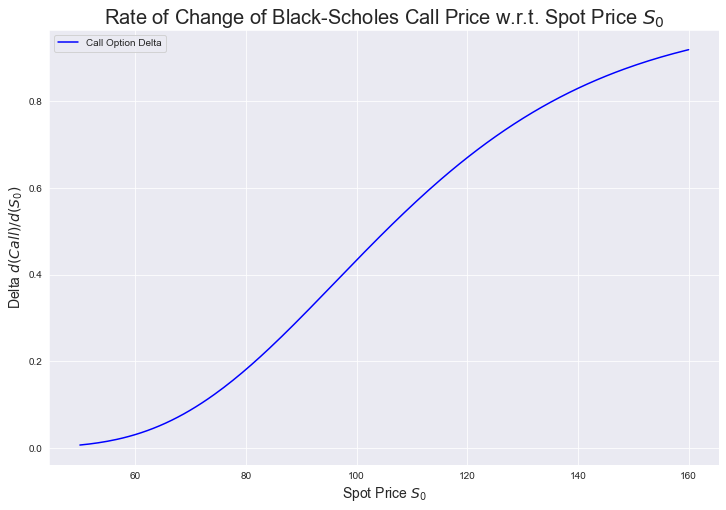

In [133]:
K = 110
sigma = 0.3
t = 1  # years to expiry
r = 0.0

S0_range = np.linspace(50, 160, 200)
call_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [call_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Call Option Delta", color='blue')
plt.title("Rate of Change of Black-Scholes Call Price w.r.t. Spot Price $S_0$", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Call)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Recall that the rate of change of the Black-Scholes call option price with respect to the spot price $S_0$ is called **Delta** (i.e. $\Delta$).

  1) When the spot price $S_0$ is much lower than the strike price $K$, the call option is unlikely to be exercised, so $\Delta\approx0$.

  2) When is close to $K$, the call option price is very sensitive to changes in $S_0$, and $\Delta\approx0.5$.

  3) When $S_0$ is much higher than $K$, the call option behaves almost like owning the stock, and $\Delta\approx1$.

For the above plot, I considered 1 year to expiry.

Given the above remarks, in the above plot, we deduce 1. for $S_0\in(50,70)$, 2. roughly at $S_0\in(100,120)$, and 3. at roughly $S_0\in(130,160)$, when considering $S_0\in[50,160]$.

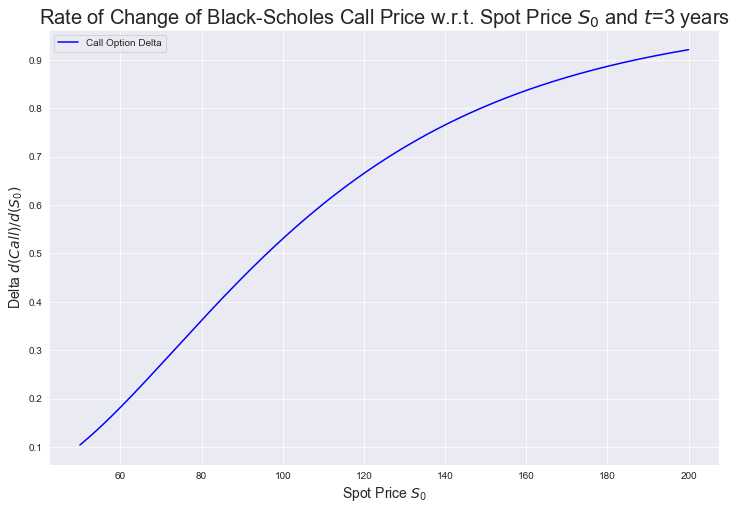

In [117]:
K = 110
sigma = 0.3
t = 3
r = 0.0

S0_range = np.linspace(50, 200, 300)
call_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [call_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Call Option Delta", color='blue')
plt.title(f"Rate of Change of Black-Scholes Call Price w.r.t. Spot Price $S_0$ and $t$={t} years", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Call)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

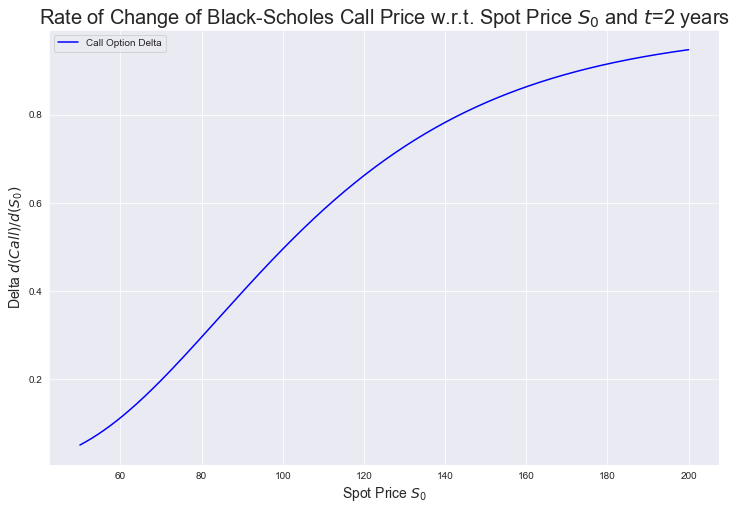

In [137]:
K = 110
sigma = 0.3
t = 2
r = 0.0

S0_range = np.linspace(50, 200, 300)
call_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [call_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Call Option Delta", color='blue')
plt.title(f"Rate of Change of Black-Scholes Call Price w.r.t. Spot Price $S_0$ and $t$={t} years", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Call)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Given the above two figures, we also notice that the $\Delta$ heavily depends on the number of years to expiry.

Furthermore, the first of the two figures above (where $t=1$) is consistent with the plot proceeding it, as anything above a spot price $S_0$ of 160 still could be classified as satisfying the aforementioned bullet point 3.

Additionally, the two figures, with $t=1$ and $t=5$, seem to be following a similar overall trend, with the exception of the fact that for $t=1$ we have a concave up trend at the beginning, and that the starting and ending $\Delta$'s differ in the two plots.

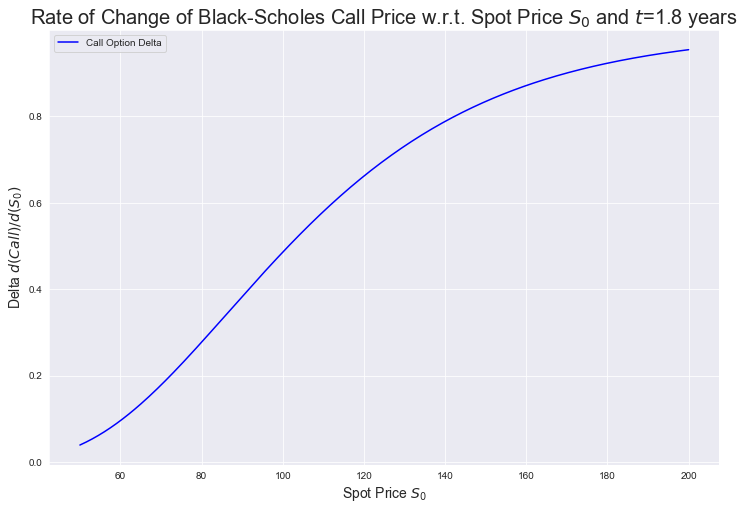

In [139]:
K = 110
sigma = 0.3
t = 1.8
r = 0.0

S0_range = np.linspace(50, 200, 300)
call_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [call_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Call Option Delta", color='blue')
plt.title(f"Rate of Change of Black-Scholes Call Price w.r.t. Spot Price $S_0$ and $t$={t} years", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Call)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

One last thing to note, is that $t$ increases, the lower value of $\Delta$ (at $S_0=0$), is higher.

# - - - Put Options - - -

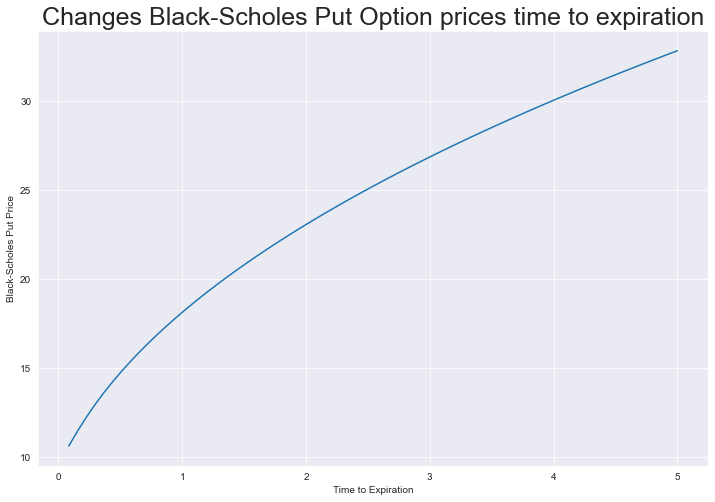

In [110]:
S0 = 100  # Current asset price
K = 110   # Strike price
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

## **a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes put option price behaves as time progresses.

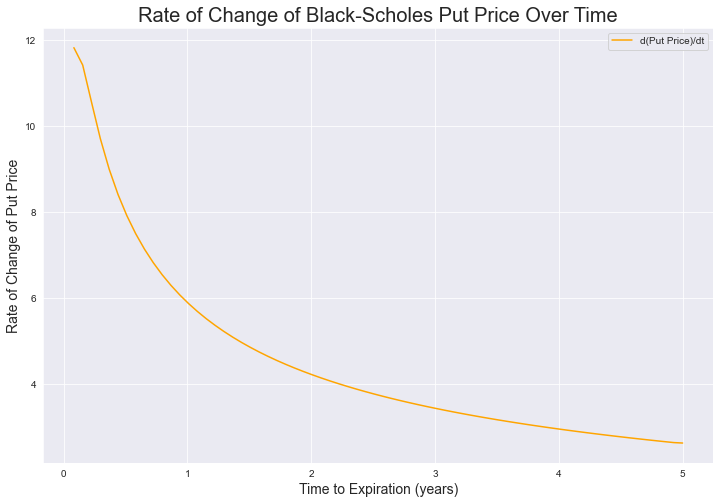

In [111]:
r = 0  # risk-free rate
times = np.linspace(1/12, 5, 70)

# put prices and their rate of change
# we calculate the rate of change through a numerical derivative
put_prices = np.array([bs_put(S0, K, sigma, t, r) for t in times])
rate_of_change_put = np.gradient(put_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_put, color='orange', label='d(Put Price)/dt')
plt.title('Rate of Change of Black-Scholes Put Price Over Time', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Put Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [112]:
# check how similar the rate of change for put and call options is
np.linalg.norm(rate_of_change_put - rate_of_change_call, ord=1)

np.float64(4.224176564093796e-12)

**Remark:** Due to "Put–call parity", and the fact that we set the same $K$ and $r$ for both rates of changes when considering call and put prices, we obtain "identical" plots.

https://en.wikipedia.org/wiki/Put%E2%80%93call_parity

Specifically, under certain conditions (e.g. $r=0$), we can have $\frac{dP}{dt} \approx \frac{dC}{dt}$.

Below we note that if we introduce a positive risk-free interest rate (i.e. $r>0$) that the plots differ. In the case of call options the rate of change starts and ends at higher rates, while put options it starts and end at ends at lower rates (even reaching negative rates of change).

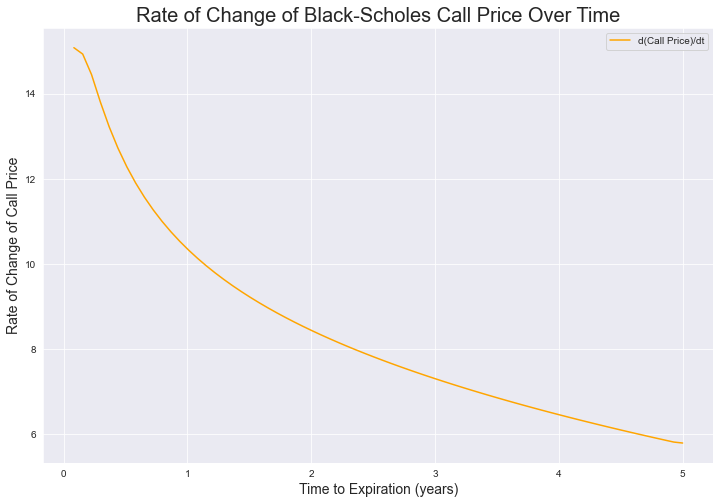

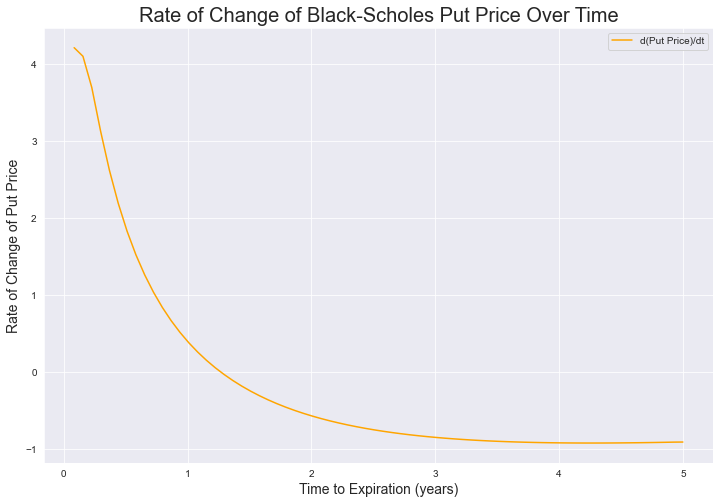

In [113]:
r = 0.1
times = np.linspace(1/12, 5, 70)

# call prices and their rate of change
# we calculate the rate of change through a numerical derivative
call_prices = np.array([bs_call(S0, K, sigma, t, r) for t in times])
rate_of_change_call = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_call, color='orange', label='d(Call Price)/dt')
plt.title('Rate of Change of Black-Scholes Call Price Over Time', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Call Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

times = np.linspace(1/12, 5, 70)

# put prices and their rate of change
# we calculate the rate of change through a numerical derivative
put_prices = np.array([bs_put(S0, K, sigma, t, r) for t in times])
rate_of_change_put = np.gradient(put_prices, times)

plt.figure(figsize=(12, 8))
plt.plot(times, rate_of_change_put, color='orange', label='d(Put Price)/dt')
plt.title('Rate of Change of Black-Scholes Put Price Over Time', fontsize=20)
plt.xlabel('Time to Expiration (years)', fontsize=14)
plt.ylabel('Rate of Change of Put Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## **b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes put option price depends on the spot price $S(0)$.

In [114]:
def put_delta(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    return norm.cdf(d1) - 1

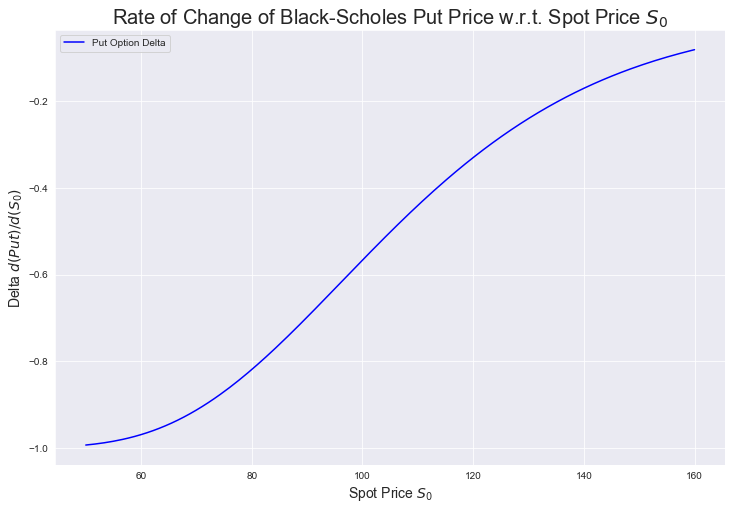

In [115]:
K = 110
sigma = 0.3
t = 1  # years to expiry
r = 0.0

S0_range = np.linspace(50, 160, 200)
put_prices = [bs_put(S, K, sigma, t, r) for S in S0_range]
deltas = [put_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Put Option Delta", color='blue')
plt.title("Rate of Change of Black-Scholes Put Price w.r.t. Spot Price $S_0$", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Put)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Compared to the corresponding plot for the call options, here we observe a reflection about the x-axis.

This is also true for when we modify the variables -- as expected, since we have `put_delta = call_delta - 1`.

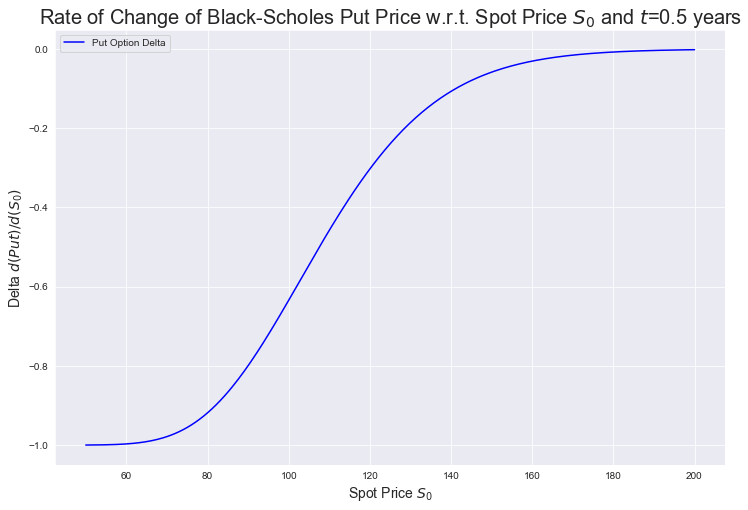

In [120]:
K = 110
sigma = 0.3
t = .5
r = 0.0

S0_range = np.linspace(50, 200, 300)
put_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [put_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Put Option Delta", color='blue')
plt.title(f"Rate of Change of Black-Scholes Put Price w.r.t. Spot Price $S_0$ and $t$={t} years", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Put)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

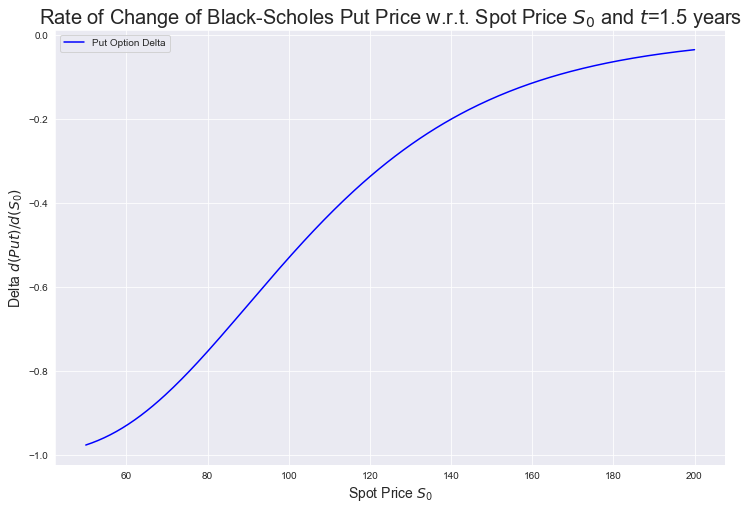

In [140]:
K = 110
sigma = 0.3
t = 1.5
r = 0.0

S0_range = np.linspace(50, 200, 300)
put_prices = [bs_call(S, K, sigma, t, r) for S in S0_range]
deltas = [put_delta(S, K, sigma, t, r) for S in S0_range]

plt.figure(figsize=(12, 8))
plt.plot(S0_range, deltas, label="Put Option Delta", color='blue')
plt.title(f"Rate of Change of Black-Scholes Put Price w.r.t. Spot Price $S_0$ and $t$={t} years", fontsize=20)
plt.xlabel("Spot Price $S_0$", fontsize=14)
plt.ylabel("Delta $d(Put)/d(S_0)$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()